# Digit Recogniser

The given task:
"In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare."

The data:

    Training:
    42,000 images of digits
    Column 0: Number depicted by image
    Column 1-784: Pixel intensity (0 black, 255 white)
    
    Example:
|label | pixel 0 | pixel 1 | pixel 2 | ... | pixel 783|
|------|---------|---------|---------|-----|----------|
|3     | 0       | 16      | 94      | ... | 43       |
    

In [31]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time
print("Successfully imported modules")

Successfully imported modules


## 1. Preparing the data

In this section we will be preparing the data before training the model.

Read files and separate information from training into labels and data. Then normalise data and reshape into the shape of the original image.

Reading files
	Reading training...
	Reading testing...
Finished
Split: 0.3 (29400 training, 12600 testing)


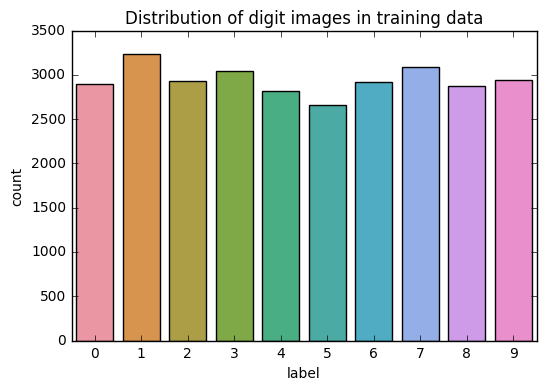

In [38]:
# Read data
print("Reading files\n\tReading training...")
training = pd.read_csv("train.csv")
train_y = training["label"]
train_x = training.drop("label", axis = 1)

print("\tReading testing...")
test_values = pd.read_csv("test.csv")
print("Finished")

# Split data into training / testing
split = 0.3
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = split, random_state=2)
print("Split: %s (%s training, %s testing)" % (split, len(train_x), len(test_x)))

# Plot number of features
cp = sns.countplot(train_y)
cp.set_title("Distribution of digit images in training data")
plt.show(cp)

In [39]:
# Normalise data (range 0-1)
train_x = train_x / 255.0
test_x = test_x / 255.0
test_values = test_values / 255.0

train_x = np.array(train_x)
test_x = np.array(test_x)
test_values = np.array(test_values)

print('Normalised data')

# Reshape. Doesn't work yet
#train_x = np.array(train_x).reshape(-1, 28, 28, 1)
#plt.imshow(train_x[0][:,:,0], cmap='Greys', interpolation='nearest')
#plt.title('Representation of a datapoint as an image')
#plt.show()

Normalised data


## 2. Creation and training of classifier

In [40]:
# Train model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

start_time = time.time()
model.fit(train_x, train_y, epochs=5, batch_size=32)
print('Finished training in %ds' % (time.time()-start_time))

Epoch 1/5
29400/29400 [==============================] - 3s 113us/step - loss: 0.3744 - acc: 0.8960
Epoch 2/5
29400/29400 [==============================] - 3s 104us/step - loss: 0.1900 - acc: 0.9442
Epoch 3/5
29400/29400 [==============================] - 3s 105us/step - loss: 0.1420 - acc: 0.9586
Epoch 4/5
29400/29400 [==============================] - 3s 101us/step - loss: 0.1138 - acc: 0.9661
Epoch 5/5
29400/29400 [==============================] - 3s 101us/step - loss: 0.0957 - acc: 0.9719
Finished training in 15s


## 3. Evaluate classifier on testing data

Test loss: 0.1448828446533945
Test accuracy: 0.9579365080500406
[2 0 9 ... 3 9 2]


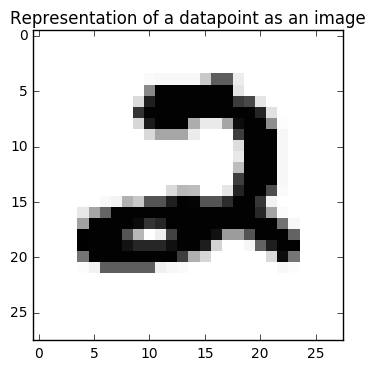

In [41]:
score = model.evaluate(test_x, test_y, batch_size=128, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# get classifications
predicted_classes = model.predict_classes(test_values)
print(predicted_classes)

img = test_values[0]
img = np.array(img).reshape(-1, 28, 28, 1)
plt.imshow(img[0][:,:,0], cmap='Greys', interpolation='nearest')
plt.title('Representation of a datapoint as an image')
plt.show()

## 4. Write prediction results to file
Here we create the formatted list of results and save it to a .csv file named 'submission.csv'

In [42]:
text_output = []
for i in range(0, len(predicted_classes)):
    text_output.append([int(i+1), int(predicted_classes[i])])
text_output = [[int(number) for number in row] for row in text_output]
print(text_output[:10])
df = pd.DataFrame(data=text_output)
try:
    df.to_csv('submission.csv', sep=',', header=['ImageId', 'Label'], index=False)
    print('File written')
except:
    print('Error writing file')


[[1, 2], [2, 0], [3, 9], [4, 4], [5, 3], [6, 7], [7, 0], [8, 3], [9, 0], [10, 3]]
File written
